In [76]:
import numpy as np
import pandas as pd

In [77]:
uber=pd.read_csv("F:/Uber Request Data.csv")
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [78]:
df_uber=uber.copy()

In [79]:
#addressing data quality issues and converting request and drop timestamp to datetime format
df_uber['Request timestamp']=pd.to_datetime(uber['Request timestamp'])

In [80]:
df_uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'])

In [81]:
#replacing blanks in column name 
df_uber.columns = [col.replace(' ', '_') for col in df_uber.columns]

In [82]:
#drop unnecessary columns
df_uber=df_uber.drop(['Request_id','Driver_id','Drop_timestamp'], axis=1)
df_uber.head()

,Pickup_point,Status,Request_timestamp
0,Airport,Trip Completed,2016-11-07 11:51:00
1,Airport,Trip Completed,2016-11-07 17:57:00
2,City,Trip Completed,2016-12-07 09:17:00
3,Airport,Trip Completed,2016-12-07 21:08:00
4,City,Trip Completed,2016-07-13 08:33:16


In [83]:
#checking unique values in status column
df_uber['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [84]:
#dividing the trips into 6 sessions based on dt.hour from Request Timestamp

session_labels=['Late Night','Early Morning','Late Morning','Afternoon','Evening','Night']


In [85]:
df_uber=df_uber.assign(session=pd.cut(df_uber.Request_timestamp.dt.hour,[-1,4,8,12,16,20,24],labels=session_labels))
df_uber.head()

,Pickup_point,Status,Request_timestamp,session
0,Airport,Trip Completed,2016-11-07 11:51:00,Late Morning
1,Airport,Trip Completed,2016-11-07 17:57:00,Evening
2,City,Trip Completed,2016-12-07 09:17:00,Late Morning
3,Airport,Trip Completed,2016-12-07 21:08:00,Night
4,City,Trip Completed,2016-07-13 08:33:16,Early Morning


In [86]:
import matplotlib.pyplot as plt

In [87]:
import seaborn as sns

In [88]:
# plotting share/frequency of all "Trip Status" over the day to identify problem areas
plt.style.use('ggplot')

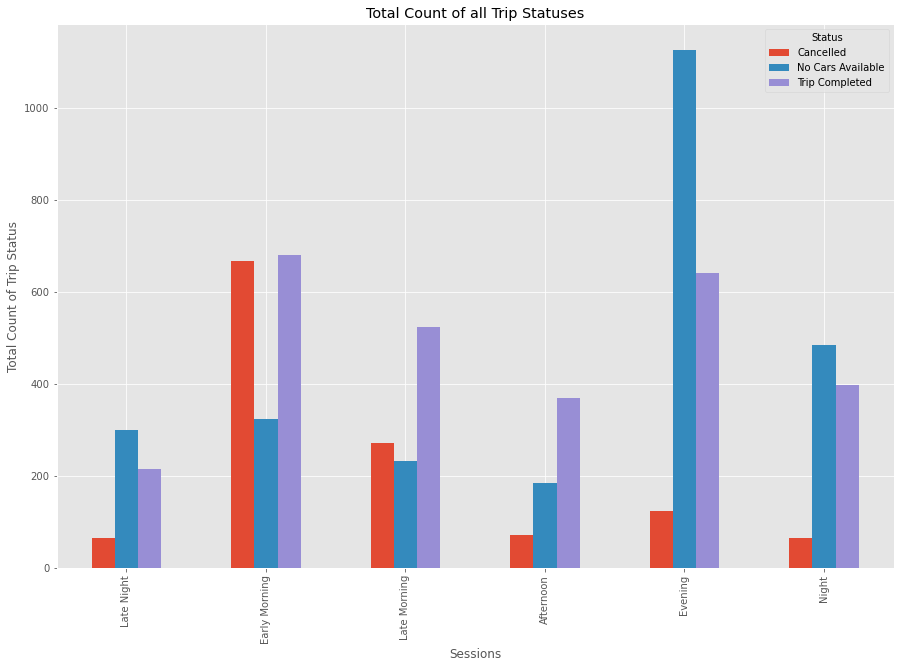

In [89]:
df_uber.groupby(['session','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10))
plt.title('Total Count of all Trip Statuses')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trip Status')
plt.show()

In [90]:
# Filtering out only "Cancelled"  trips
df_tripscancelled=df_uber[df_uber["Status"].str.contains('Cancelled')==True]

In [91]:
df_tripscancelled=df_tripscancelled.reset_index(drop=True)
df_tripscancelled.head()

,Pickup_point,Status,Request_timestamp,session
0,City,Cancelled,2016-07-13 06:08:41,Early Morning
1,City,Cancelled,2016-07-14 17:07:58,Evening
2,Airport,Cancelled,2016-07-14 20:51:37,Evening
3,City,Cancelled,2016-07-15 10:12:40,Late Morning
4,Airport,Cancelled,2016-12-07 19:14:00,Evening


In [92]:
# plotting share/frequency of all Cancelled trips over the day to identify problem areas
plt.style.use('ggplot')

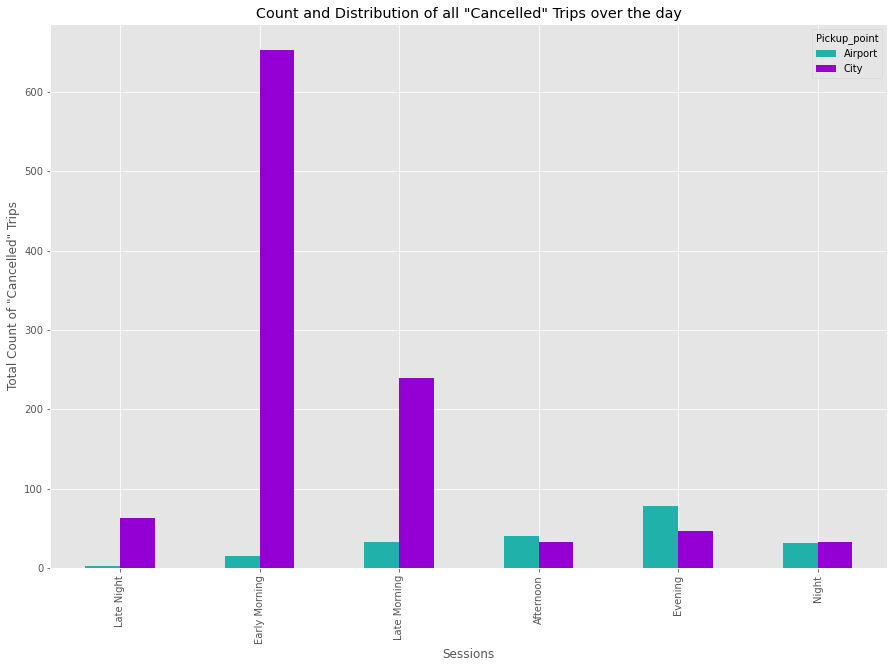

In [93]:
colors = ["#20B2AA", "#9400D3"]
df_tripscancelled.groupby(['session','Pickup_point']).Pickup_point.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Count and Distribution of all "Cancelled" Trips over the day')
plt.xlabel('Sessions')
plt.ylabel('Total Count of "Cancelled" Trips')
plt.show()

In [94]:
# Filtering out only "Cancelled"  trips
df_nocar=df_uber[df_uber["Status"].str.contains('No Car')==True]

In [95]:
df_nocar=df_nocar.reset_index(drop=True)
df_nocar.head()

,Pickup_point,Status,Request_timestamp,session
0,City,No Cars Available,2016-11-07 00:02:00,Late Night
1,City,No Cars Available,2016-11-07 00:06:00,Late Night
2,City,No Cars Available,2016-11-07 00:09:00,Late Night
3,Airport,No Cars Available,2016-11-07 00:23:00,Late Night
4,Airport,No Cars Available,2016-11-07 00:30:00,Late Night


In [96]:
plt.style.use('ggplot')

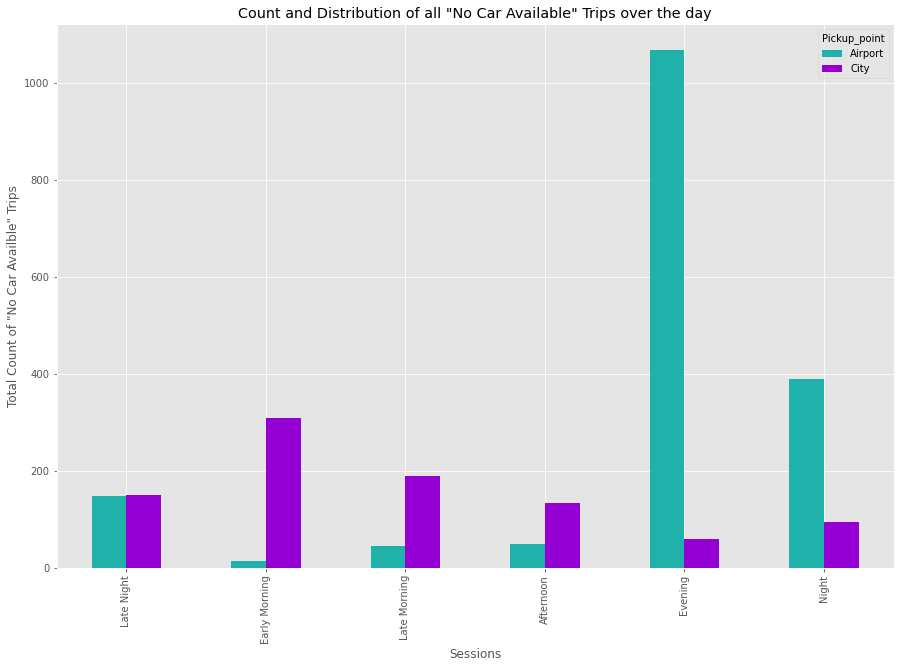

In [97]:

colors = ["#20B2AA", "#9400D3"]
df_nocar.groupby(['session','Pickup_point']).Pickup_point.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Count and Distribution of all "No Car Available" Trips over the day')
plt.xlabel('Sessions')
plt.ylabel('Total Count of "No Car Availble" Trips')
plt.show()

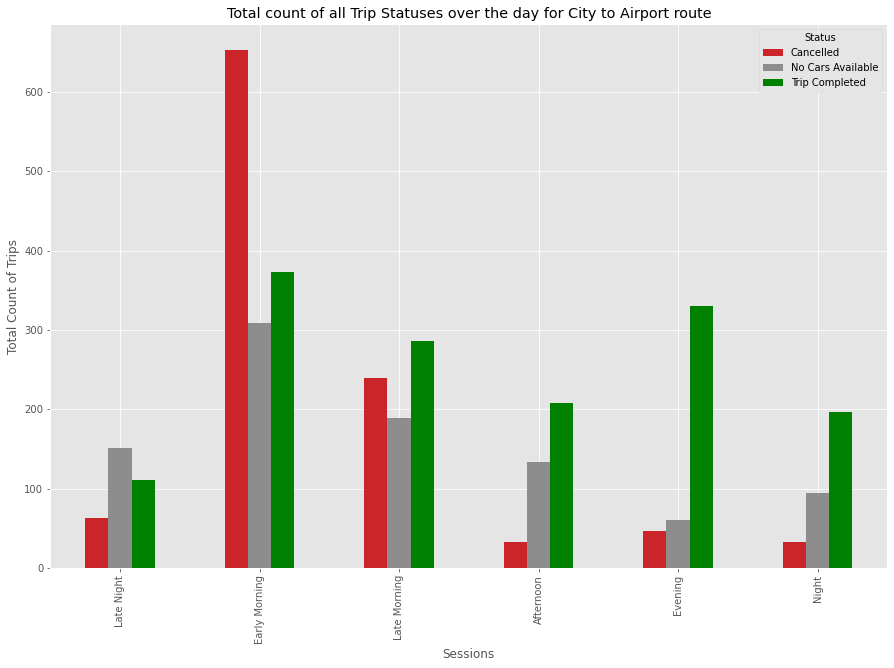

In [98]:
# Filtering out trips in the City to Airport route. Pick-up Point - City
df_citytoairport=df_uber[df_uber["Pickup_point"].str.contains('City')==True]
plt.style.use('ggplot')
colors = ["#CC2529", "#8E8D8D","#008000"]
df_citytoairport.groupby(['session','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Total count of all Trip Statuses over the day for City to Airport route')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trips')
plt.show()

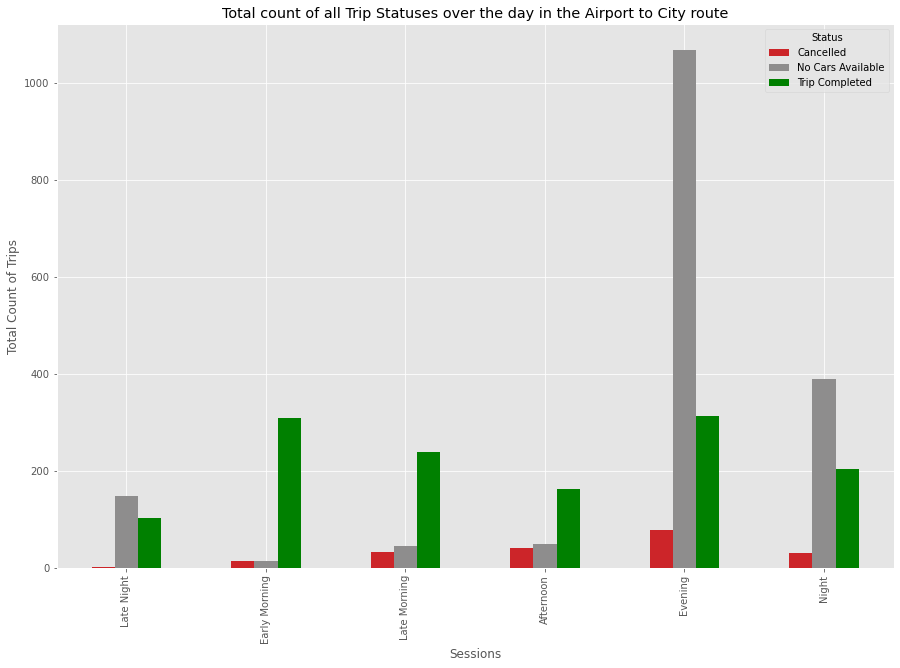

In [99]:
# Filtering out trips in the Airport to route. Pick-up Point - Airport
df_airporttocity=df_uber[df_uber["Pickup_point"].str.contains('Airport')==True]
plt.style.use('ggplot')
colors = ["#CC2529", "#8E8D8D","#008000"]
df_airporttocity.groupby(['session','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Total count of all Trip Statuses over the day in the Airport to City route')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trips')
plt.show()

In [100]:
df_uber['supply_demand'] = ['Supply' if x == 'Trip Completed' else 'Demand' for x in df_uber['Status']]
df_uber.head()

,Pickup_point,Status,Request_timestamp,session,supply_demand
0,Airport,Trip Completed,2016-11-07 11:51:00,Late Morning,Supply
1,Airport,Trip Completed,2016-11-07 17:57:00,Evening,Supply
2,City,Trip Completed,2016-12-07 09:17:00,Late Morning,Supply
3,Airport,Trip Completed,2016-12-07 21:08:00,Night,Supply
4,City,Trip Completed,2016-07-13 08:33:16,Early Morning,Supply


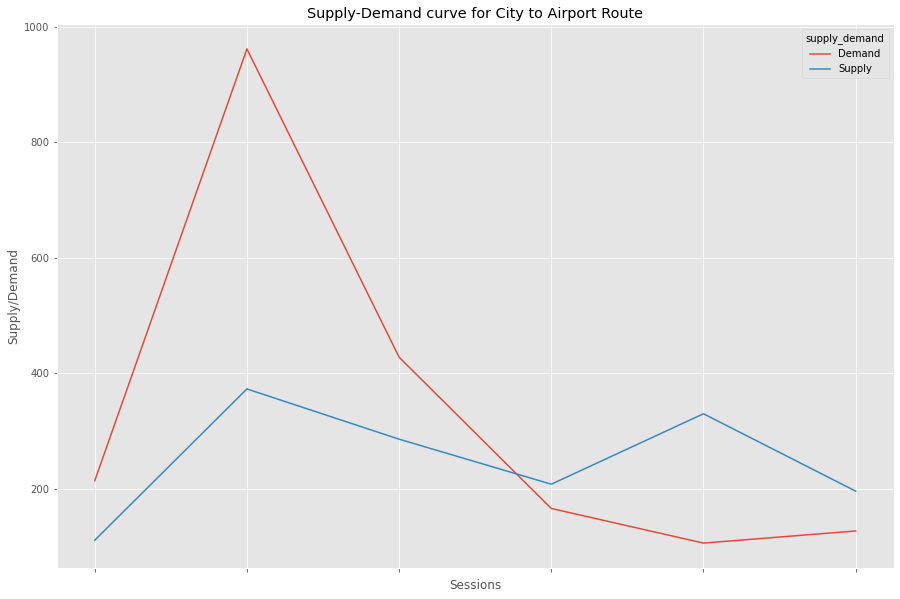

In [101]:
#Plotting Supply and Demand on the City to Airport Route
df_citytoairport_supplydemand=df_uber[df_uber["Pickup_point"].str.contains('City')==True]
plt.style.use('ggplot')
df_citytoairport_supplydemand.groupby(['session','supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(15,10))
plt.title('Supply-Demand curve for City to Airport Route')
plt.xlabel('Sessions')
plt.ylabel('Supply/Demand')
plt.show()

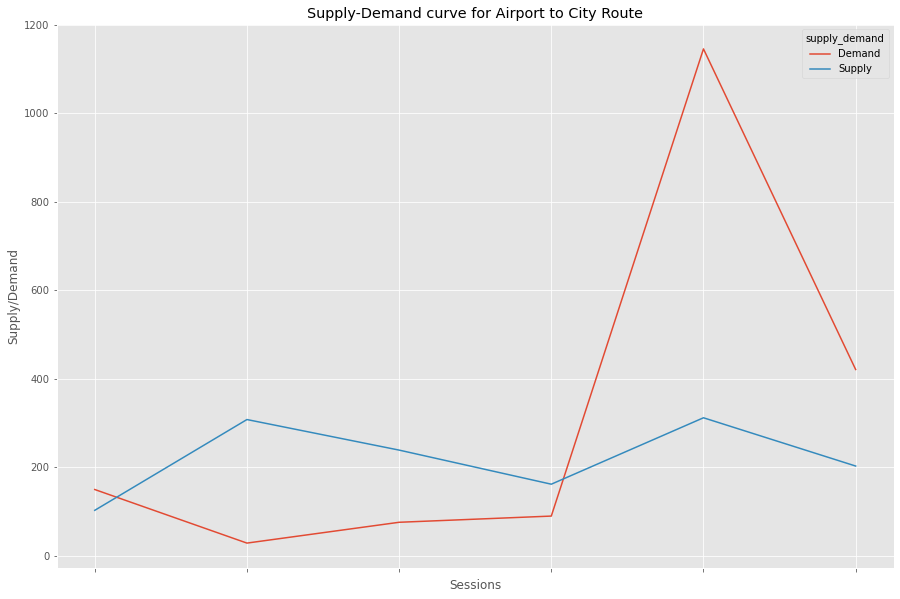

In [102]:
#Plotting Supply and Demand on the Airport to City route
df_airporttocity_supplydemand=df_uber[df_uber["Pickup_point"].str.contains('Airport')==True]
plt.style.use('ggplot')
df_airporttocity_supplydemand.groupby(['session','supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(15,10))
plt.title('Supply-Demand curve for Airport to City Route')
plt.xlabel('Sessions')
plt.ylabel('Supply/Demand')
plt.show()